# Section A

In [1]:
import pprint
import graphviz
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
from sklearn import metrics
from pandas import DataFrame
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , recall_score
from sklearn.metrics import ConfusionMatrixDisplay ,auc ,roc_curve

from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
def load_data(path):
    
    data=pd.read_csv(path)
    
    return data


path = 'data_20512786.csv'
data = load_data(path)
datas = data.iloc[:,2:].copy()

data_new = datas.copy() 

print(data_new['MARRIAGE'].value_counts())
print()
print(data_new['EDUCATION'].value_counts())
print()

data_new['MARRIAGE'].replace(0,3,inplace=True)
data_new['EDUCATION'].replace([0,5,6],[4,4,4],inplace=True)

data_new2 = data_new.copy()
print(data_new2['MARRIAGE'].value_counts())
print()
print(data_new2['EDUCATION'].value_counts())
print()
    

2    3740
1    3172
3      76
0      12
Name: MARRIAGE, dtype: int64

2    3257
1    2442
3    1183
5      69
4      32
6      12
0       5
Name: EDUCATION, dtype: int64

2    3740
1    3172
3      88
Name: MARRIAGE, dtype: int64

2    3257
1    2442
3    1183
4     118
Name: EDUCATION, dtype: int64



In [3]:
print(datas['Y'].value_counts()) 

datas.isnull().sum().sort_values(ascending=False)

0    5500
1    1500
Name: Y, dtype: int64


LIMIT_BAL    0
SEX          0
PAY_AMT6     0
PAY_AMT5     0
PAY_AMT4     0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT6    0
BILL_AMT5    0
BILL_AMT4    0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_6        0
PAY_5        0
PAY_4        0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
MARRIAGE     0
EDUCATION    0
Y            0
dtype: int64

In [4]:
data_new2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,166671.714286,1.600000,1.853857,1.559429,35.409143,-0.029857,-0.123714,-0.160286,-0.218857,-0.271714,...,41977.150857,38681.734286,37125.382857,5584.894857,5.562742e+03,5039.173286,4715.897857,4442.069857,4985.322000,0.214286
std,129122.788900,0.489933,0.751005,0.521200,9.329870,1.113040,1.192254,1.190173,1.159683,1.120616,...,61424.515355,56666.698786,55395.748668,15808.395734,2.095090e+04,14687.115176,13955.239457,14691.646260,17915.554157,0.410355
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-39046.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1835.000000,1185.000000,1000.000000,7.800000e+02,404.750000,306.750000,200.000000,137.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18828.000000,17948.500000,16311.500000,2133.000000,2.000000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51518.500000,49201.750000,48216.250000,5006.000000,5.000000e+03,4400.000000,4000.000000,4000.000000,4000.000000,0.000000
max,750000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,628699.000000,530672.000000,474459.000000,493358.000000,1.227082e+06,325000.000000,331788.000000,426529.000000,528666.000000,1.000000


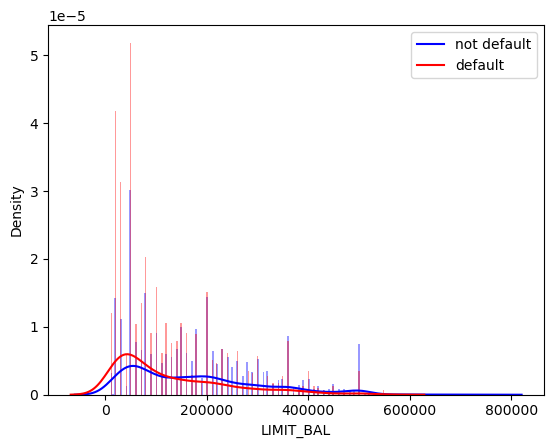

In [5]:
default_0 = data_new2[data_new2['Y'] == 0]
default_1 = data_new2[data_new2['Y'] == 1]


sns.set_color_codes('pastel')
sns.distplot(default_0['LIMIT_BAL'],kde=True,bins=200, color='blue')
sns.distplot(default_1['LIMIT_BAL'],kde=True,bins=200, color='red')
plt.xlabel('LIMIT_BAL')
plt.legend(['not default','default'])
#plt.savefig('Credit limits distribution of defaulting and non-defaulting customers.jpg',dpi=1080)
plt.show()


Index(['Y', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION',
       'AGE', 'BILL_AMT5'],
      dtype='object')


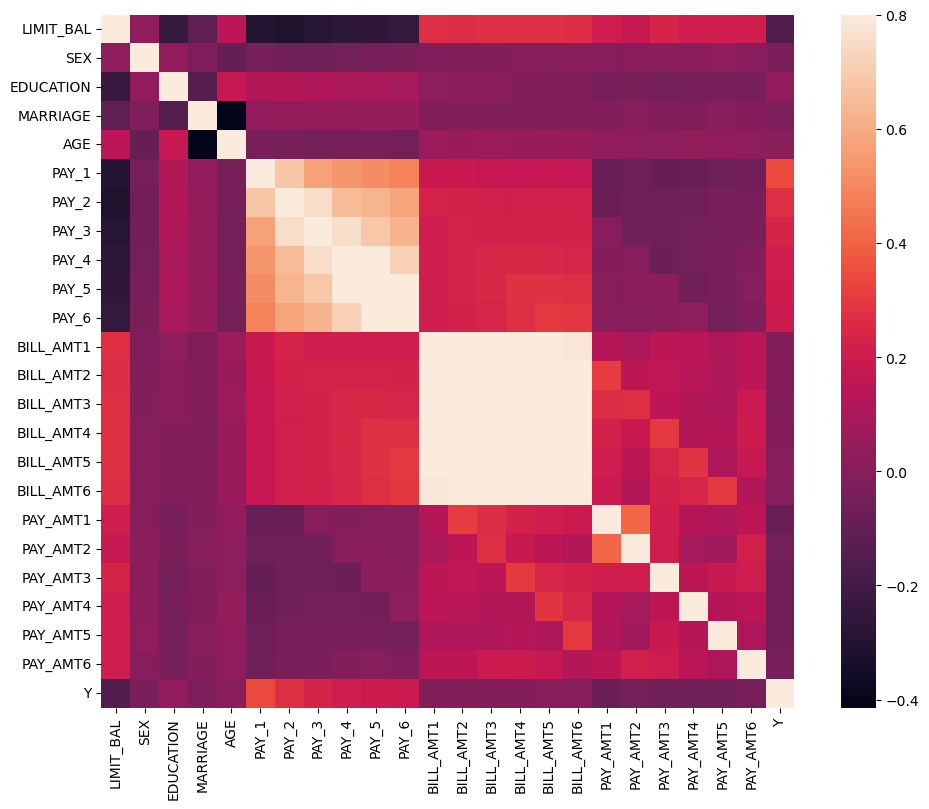

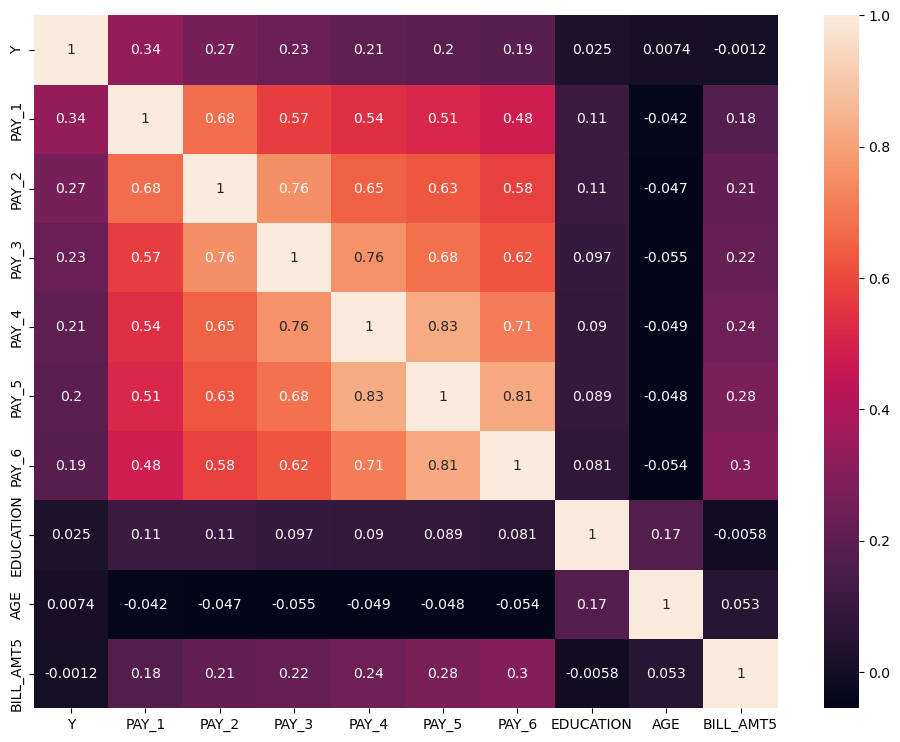

In [6]:
corrmat = data_new2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 10
cols_10 = corrmat.nlargest(k, 'Y')['Y'].index 
print(cols_10)
corrs_10 = datas[cols_10].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrs_10, annot=True)
#plt.savefig('The correlation coefficients between each feature and Y.jpg',dpi=1080)
plt.show()

# Section B

In [7]:
X = data_new2.iloc[:,:-1]
Y = data_new2.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

dt = DecisionTreeClassifier(random_state=2)
dt.fit(x_train, y_train)
Y_train_pre = dt.predict(x_train)
Y_test_pre = dt.predict(x_test)
CA_train = accuracy_score(y_train,Y_train_pre)
CA_test = accuracy_score(y_test,Y_test_pre)
print('CA',CA_train,CA_test)
print()

feature_importance = pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = dt.feature_importances_
print(feature_importance)
print()

feature_name=datas.columns[:-1]
data_tar = ['0','1']
feature_name = feature_name.to_list()

dot_data = tree.export_graphviz(dt,out_file=None,feature_names=feature_name,class_names=data_tar,
                             filled=True,rounded=True,special_characters=True,max_depth=4)

#graph=graphviz.Source(dot_data)
#graph.view()

CA 1.0 0.7285714285714285

     features  feature_importances
0   LIMIT_BAL             0.064545
1         SEX             0.020439
2   EDUCATION             0.030635
3    MARRIAGE             0.019048
4         AGE             0.084522
5       PAY_1             0.180330
6       PAY_2             0.031855
7       PAY_3             0.009771
8       PAY_4             0.005705
9       PAY_5             0.010207
10      PAY_6             0.005654
11  BILL_AMT1             0.057208
12  BILL_AMT2             0.058842
13  BILL_AMT3             0.045748
14  BILL_AMT4             0.048790
15  BILL_AMT5             0.019077
16  BILL_AMT6             0.043192
17   PAY_AMT1             0.038408
18   PAY_AMT2             0.051695
19   PAY_AMT3             0.041475
20   PAY_AMT4             0.041053
21   PAY_AMT5             0.044388
22   PAY_AMT6             0.047414



In [8]:
feature_importance.sort_values(by ='feature_importances',ascending=False)[:10]['features'].values

array(['PAY_1', 'AGE', 'LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT2',
       'BILL_AMT4', 'PAY_AMT6', 'BILL_AMT3', 'PAY_AMT5'], dtype=object)

In [9]:
X = data_new2.iloc[:,:-1]
Y = data_new2.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X.drop(['PAY_6','PAY_4','PAY_3','PAY_5'],axis=1), Y, test_size=0.3, 
                                                   random_state=1)

dt = DecisionTreeClassifier(random_state=2)
dt.fit(x_train, y_train)
Y_train_pre = dt.predict(x_train)
Y_test_pre = dt.predict(x_test)
CA_train = accuracy_score(y_train,Y_train_pre)
CA_test = accuracy_score(y_test,Y_test_pre)
print('CA_train:',CA_train,'CA_test:' ,CA_test)


CA_train: 1.0 CA_test: 0.7323809523809524


# Section C

# Decision Tree

In [10]:
dt = DecisionTreeClassifier(random_state=2)
dt_param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'min_samples_leaf':range(1,50,5),
    'max_depth':range(3,14,2),
}
gs = GridSearchCV(dt,dt_param_grid,cv=5,scoring = 'roc_auc')
gs.fit(X.drop(['PAY_6','PAY_4','PAY_5','PAY_3'],axis=1), Y)
print(gs.best_params_)
print(gs.best_score_)


{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 41, 'splitter': 'random'}
0.7609548484848485


CA_train: 0.820204081632653 CA_test: 0.83

TP:130
FN:293
FP:64
TN:1613

CA: 0.830
precision: 0.670
recall: 0.307
F1: 0.421


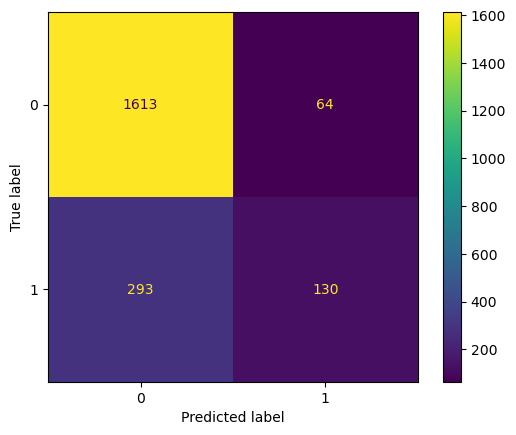

In [11]:
dt = DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_leaf=41, max_depth=13,random_state=2)
dt.fit(x_train, y_train)
Y_train_pre = dt.predict(x_train)
Y_test_pre = dt.predict(x_test)
CA_train = accuracy_score(y_train,Y_train_pre)
CA_test = accuracy_score(y_test,Y_test_pre)
print('CA_train:',CA_train,'CA_test:', CA_test)  
print()

CM = confusion_matrix(y_test,Y_test_pre)
ConfusionMatrixDisplay(CM).plot()
def show_metrics(cm):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('TP:{}\nFN:{}\nFP:{}\nTN:{}'.format(tp,fn,fp,tn))
    print()
    print('CA: {:.3f}'.format((tp+tn)/(tp+fp+tn+fn)))
    print('precision: {:.3f}'.format(tp/(tp+fp)))
    print('recall: {:.3f}'.format(tp/(tp+fn)))
    print('F1: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

show_metrics(CM)
#plt.savefig('dt_confusion_matrix.jpg',dpi=1080)

# Logistic Regression

In [12]:
lr = LogisticRegression(penalty='l1',
                        dual=False,
                        random_state=2,
                        solver='liblinear',
                        multi_class='ovr',
                 
)

lr_param_grid = {
    'C':np.linspace(0.1,1,10),
    'max_iter':range(50,200,10)
}
gs = GridSearchCV(lr,lr_param_grid,scoring='roc_auc',cv=5)


X_scaled = preprocessing.scale(X.drop(['PAY_6','PAY_4','PAY_3','PAY_5'],axis=1))
gs.fit(X_scaled, Y)

print(gs.best_params_)
print(gs.best_score_)


{'C': 1.0, 'max_iter': 50}
0.7300351515151515


CA_train: 0.8177551020408164 CA_test: 0.829047619047619

TP:111
FN:312
FP:47
TN:1630

CA: 0.829
precision: 0.703
recall: 0.262
F1: 0.382


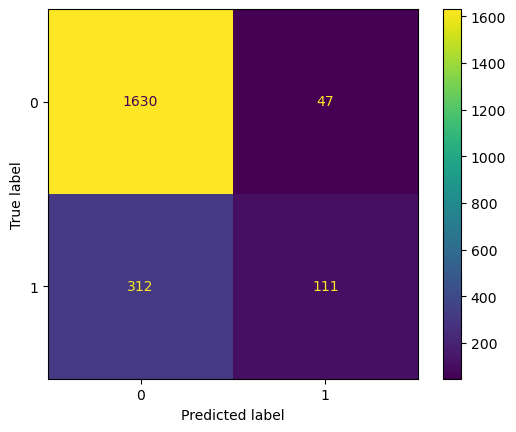

In [13]:
lr = LogisticRegression(penalty='l1',
                        dual=False, 
                        max_iter=50,
                        C=1.0,  
                        random_state=2,
                        solver='liblinear',
                        multi_class='ovr',
                        
                    )

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1)
lr.fit(x_train,y_train)
Y_train_pre = lr.predict(x_train)
Y_test_pre = lr.predict(x_test)
CA_train = accuracy_score(y_train,Y_train_pre)
CA_test = accuracy_score(y_test,Y_test_pre)
print('CA_train:',CA_train,'CA_test:', CA_test)
print()

CM=confusion_matrix(y_test,Y_test_pre)
ConfusionMatrixDisplay(CM).plot()
show_metrics(CM)
#plt.savefig('lr_confusion_matrix.jpg',dpi=1080)

# K-nearest Neighbors

In [14]:
knn = neighbors.KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors':np.linspace(1,10,10).astype(int)
    
}
gs = GridSearchCV(knn,knn_param_grid,scoring='roc_auc',cv=5)

gs.fit(X_scaled, Y)
print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 10}
0.7091369696969696


CA_train: 0.826530612244898 CA_test: 0.8280952380952381

TP:127
FN:296
FP:65
TN:1612

CA: 0.828
precision: 0.661
recall: 0.300
F1: 0.413


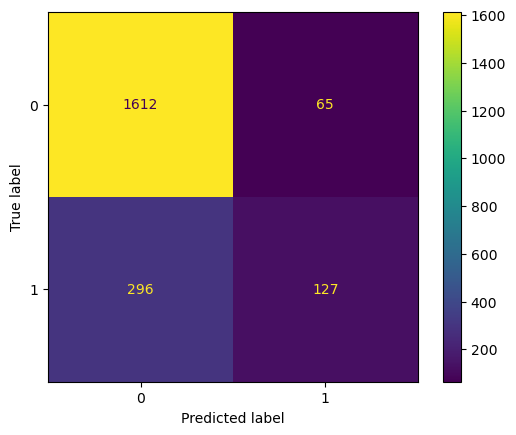

In [15]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1)
knn.fit(x_train,y_train)
Y_train_pre = knn.predict(x_train)
Y_test_pre = knn.predict(x_test)
CA_train = accuracy_score(y_train,Y_train_pre)
CA_test = accuracy_score(y_test,Y_test_pre)
print('CA_train:',CA_train,'CA_test:', CA_test) 
print()

CM = confusion_matrix(y_test,Y_test_pre)
ConfusionMatrixDisplay(CM).plot()
show_metrics(CM)
#plt.savefig('knn_confusion_matrix.jpg',dpi=1080)

# Random Forest

In [16]:
rf_param_grid = {'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
            'criterion':['entropy', 'gini'],
          'max_depth':np.linspace(1,15,15)
            }
rf = RandomForestClassifier(random_state=2)
gs = GridSearchCV(rf,rf_param_grid,scoring='roc_auc',cv=5)
gs.fit(X.drop(['PAY_6','PAY_4','PAY_3','PAY_5'],axis=1), Y)

print(gs.best_params_)
print(gs.best_score_)


{'criterion': 'gini', 'max_depth': 7.0, 'n_estimators': 14}
0.7696451515151514


CA_train: 0.8457142857142858 CA_test: 0.840952380952381

TP:142
FN:281
FP:53
TN:1624

CA: 0.841
precision: 0.728
recall: 0.336
F1: 0.460


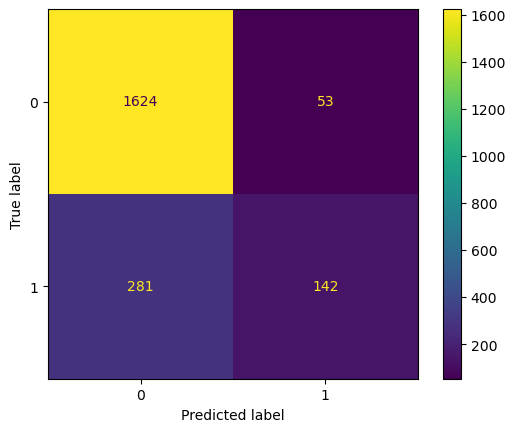

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X.drop(['PAY_6','PAY_4','PAY_3','PAY_5'],axis=1), Y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(n_estimators=14,criterion='gini',max_depth=7.0,random_state=2)
rf.fit(x_train,y_train)

Y_train_pre = rf.predict(x_train)
Y_test_pre = rf.predict(x_test)
CA_train = accuracy_score(y_train,Y_train_pre)
CA_test = accuracy_score(y_test,Y_test_pre)
print('CA_train:',CA_train,'CA_test:', CA_test)
print()
 
CM = confusion_matrix(y_test,Y_test_pre)
ConfusionMatrixDisplay(CM).plot()
show_metrics(CM)
#plt.savefig('rf_confusion_matrix.jpg',dpi=1080)

# Section E: Model Implementation

In [18]:
import joblib
import pickle
import numpy as np 
import pandas as pd 
from sklearn import metrics
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier

def load_data(path):
    data=pd.read_csv(path) 
    return data

def final_model():
    
    path = 'data_20512786.csv'
    data = load_data(path)
    datas = data.iloc[:,2:].copy()
    data_new = datas.copy() 
    data_new['MARRIAGE'].replace(0,3,inplace=True)
    data_new['EDUCATION'].replace([0,5,6],[4,4,4],inplace=True)
    data_new2 = data_new.copy()
    X = data_new2.iloc[:,:-1]
    Y = data_new2.iloc[:,-1]
    X2 = X.drop(['PAY_6','PAY_4','PAY_3','PAY_5'],axis=1) 
    rf = RandomForestClassifier(n_estimators=14,criterion='gini',max_depth=7.0,random_state=2)
    rf.fit(X2,Y)
    joblib.dump(rf, 'RF_model.pkl')

final_model()

# Make predictions for new data sets

In [19]:
path='data_20512786.csv'  #Users need to change the path of test data
X_TEST = load_data(path)
X_TEST1 = X_TEST.iloc[:,2:]

if 'Y' in X_TEST1.columns:
    X_TEST2 = X_TEST1.drop('Y',axis=1)
else:
    X_TEST2 = X_TEST1    
X_TEST3 = X_TEST2.drop(['PAY_6','PAY_4','PAY_3','PAY_5'],axis=1) 

d = joblib.load('RF_model.pkl')
c = d.predict(X_TEST3)
predict_result = pd.DataFrame()
predict_result['ID'] = X_TEST.iloc[:,1:2].copy()
predict_result['Result'] = c
print(predict_result)
print()
print(predict_result['Result'].value_counts())
#predict_result.to_csv('predict_result.csv')

         ID  Result
0      9324       0
1      3816       0
2     16163       1
3      4910       1
4      6834       1
...     ...     ...
6995  11742       0
6996  16841       0
6997  25124       0
6998  22460       1
6999   2165       0

[7000 rows x 2 columns]

0    6272
1     728
Name: Result, dtype: int64
